In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_excel(
    "data\Данные_для_курсовои_Классическое_МО.xlsx"
)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [4]:
data.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
data.describe()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,264.321000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,315.457000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,409.283000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


Обработка пропусков

In [7]:
data.isnull().sum().sum()

36

In [8]:
columns_with_missing = data.isnull().sum()
columns_with_missing = columns_with_missing[columns_with_missing > 0]

columns_with_missing

MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64

Удаляем строки с пропусками и проверяем, что больше их нет

In [9]:
data = data.dropna()

data.isnull().sum().sum()

0

In [10]:
# Проверим формулу SI = CC50 / IC50 (если SI есть в данных)
if {"IC50", "CC50", "SI"}.issubset(data.columns):
    data["SI_calc"] = data["CC50"] / data["IC50"]
    diff = np.abs(data["SI"] - data["SI_calc"])
    print(f"\nМаксимальное отклонение между SI и расчетным значением: {diff.max()}")

Проверка на дубликаты

In [11]:
print(f"Полных дубликатов: {data.duplicated().sum()}")

Полных дубликатов: 32


Удаляем их

In [12]:
data = data.drop_duplicates()

print(f"Полных дубликатов после чистки: {data.duplicated().sum()}")

Полных дубликатов после чистки: 0


Рассмотрим более подробно целевые переменные

In [13]:
target_variables = ["IC50, mM", "CC50, mM", "SI"]

In [14]:
for col in target_variables:
    if col in data.columns:
        fig = px.histogram(
            data,
            x=col,
            nbins=50,
            marginal="box",
            title=f"Распределение {col}",
        
        )
        fig.show()
    else:
        print(f"Столбец {col} не найден в данных")

Попробуем логарифмировать целевые переменные

In [15]:
for col in target_variables:
    if col in data.columns:
        # добавим только положительные значения (иначе log10 не определён)
        data[f"log10_{col}"] = np.log10(data[col].replace(0, np.nan))
    else:
        print(f"Столбец {col} не найден в данных")

# строим распределения
for col in [f"log10_{c}" for c in target_variables if c in data.columns]:
    fig = px.histogram(
        data, x=col, nbins=50, marginal="box", title=f"Распределение {col}"
    )
    fig.show()

## Корреляционный анализ

In [16]:
data.corr()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,"log10_IC50, mM","log10_CC50, mM",log10_SI
"IC50, mM",1.000000,0.517785,-0.056860,0.106273,0.106273,-0.085106,-0.174451,0.102420,-0.067422,-0.156589,...,0.017069,0.058218,-0.078845,NaN,0.007438,-0.048959,0.012797,0.663748,0.424983,-0.420719
"CC50, mM",0.517785,1.000000,-0.005991,-0.112728,-0.112728,0.078929,0.042831,0.115097,0.123613,-0.308940,...,0.019403,0.017808,-0.078597,NaN,-0.042534,-0.010502,0.085480,0.452648,0.750404,0.152232
SI,-0.056860,-0.005991,1.000000,0.004979,0.004979,-0.055604,0.020475,0.041375,-0.004323,-0.042891,...,-0.003323,-0.003380,-0.021893,NaN,-0.024143,-0.007742,-0.005060,-0.292309,-0.003147,0.360728
MaxAbsEStateIndex,0.106273,-0.112728,0.004979,1.000000,1.000000,-0.659260,-0.524018,-0.162496,-0.403843,0.389745,...,-0.055106,0.011353,0.138921,NaN,0.114346,-0.211122,0.029812,0.094559,-0.048508,-0.163913
MaxEStateIndex,0.106273,-0.112728,0.004979,1.000000,1.000000,-0.659260,-0.524018,-0.162496,-0.403843,0.389745,...,-0.055106,0.011353,0.138921,NaN,0.114346,-0.211122,0.029812,0.094559,-0.048508,-0.163913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_unbrch_alkane,-0.048959,-0.010502,-0.007742,-0.211122,-0.211122,0.250655,0.092583,-0.257897,0.024377,0.215800,...,-0.005461,-0.005461,-0.040464,NaN,-0.046682,1.000000,-0.014494,-0.069962,-0.002420,0.084747
fr_urea,0.012797,0.085480,-0.005060,0.029812,0.029812,-0.060518,0.038566,0.077893,0.040994,-0.046936,...,-0.002750,-0.002750,-0.020378,NaN,-0.023510,-0.014494,1.000000,0.042115,0.077977,0.021942
"log10_IC50, mM",0.663748,0.452648,-0.292309,0.094559,0.094559,0.002802,-0.109344,0.016885,-0.031012,-0.030607,...,0.033423,0.045076,-0.004717,NaN,0.068636,-0.069962,0.042115,1.000000,0.614217,-0.658700
"log10_CC50, mM",0.424983,0.750404,-0.003147,-0.048508,-0.048508,0.045462,-0.012487,0.095707,0.068463,-0.156744,...,0.026008,0.025364,-0.005052,NaN,0.041835,-0.002420,0.077977,0.614217,1.000000,0.189166


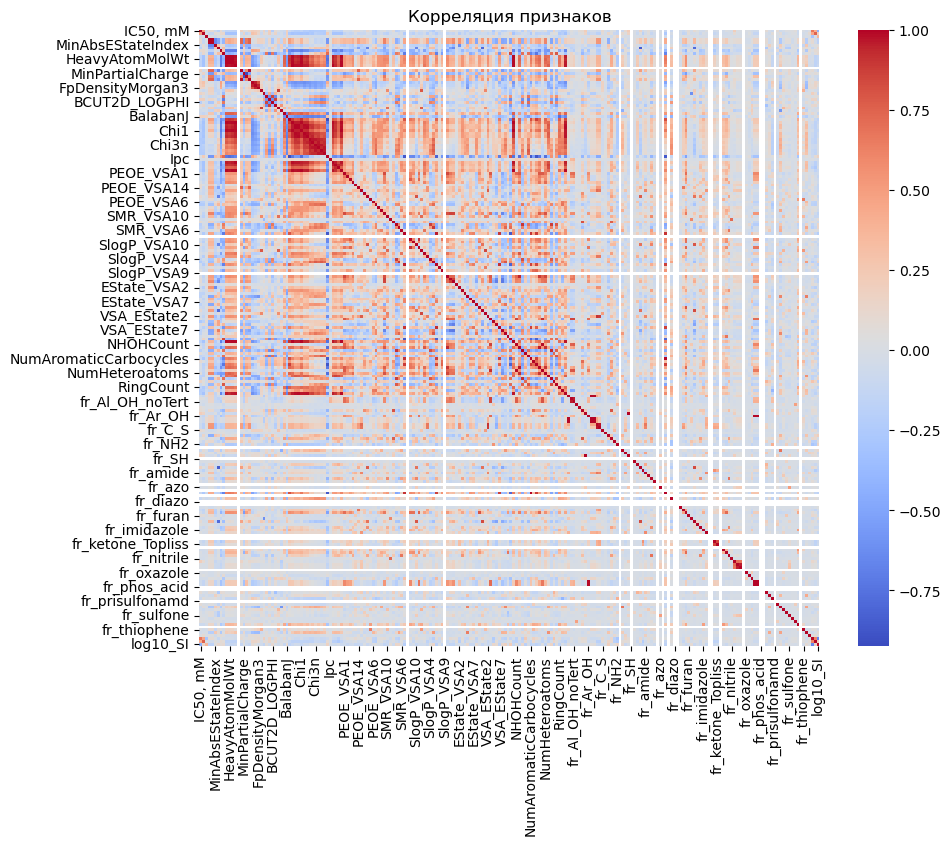

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

In [18]:
# Считаем матрицу корреляций только по числовым признакам
corr_matrix = data.corr(numeric_only=True)

# Ищем пары с корреляцией > 0.9
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        if corr_val > 0.9:  # только сильная положительная корреляция
            high_corr_pairs.append((col1, col2, corr_val))

# Сортировка по убыванию корреляции
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -x[2])

# Вывод
print("Пары признаков с корреляцией > 0.9:\n")
for col1, col2, val in high_corr_pairs:
    print(f"{col1} — {col2}: {val:.3f}")

Пары признаков с корреляцией > 0.9:

MaxAbsEStateIndex — MaxEStateIndex: 1.000
NumAromaticCarbocycles — fr_benzene: 1.000
fr_Ar_NH — fr_Nhpyrrole: 1.000
fr_COO — fr_COO2: 1.000
fr_phenol — fr_phenol_noOrthoHbond: 1.000
MolWt — ExactMolWt: 1.000
Chi1 — HeavyAtomCount: 0.999
MolWt — HeavyAtomMolWt: 0.997
HeavyAtomMolWt — ExactMolWt: 0.997
Chi0 — HeavyAtomCount: 0.996
NumValenceElectrons — Chi0: 0.995
LabuteASA — HeavyAtomCount: 0.994
Chi0n — Chi0v: 0.993
Chi1 — LabuteASA: 0.993
Chi0 — Chi1: 0.991
fr_Ar_OH — fr_phenol: 0.991
fr_Ar_OH — fr_phenol_noOrthoHbond: 0.991
NumValenceElectrons — LabuteASA: 0.991
NumValenceElectrons — HeavyAtomCount: 0.991
fr_Al_COO — fr_COO: 0.990
fr_Al_COO — fr_COO2: 0.990
Chi0n — Chi1n: 0.990
Chi0 — LabuteASA: 0.990
ExactMolWt — HeavyAtomCount: 0.989
MolWt — HeavyAtomCount: 0.989
Chi0v — Chi1v: 0.989
Chi0v — MolMR: 0.989
ExactMolWt — LabuteASA: 0.989
MolWt — LabuteASA: 0.988
ExactMolWt — Chi1: 0.987
MolWt — Chi1: 0.987
ExactMolWt — Chi0: 0.987
NumValenceElectron

In [19]:
def drop_correlated_groups(df, threshold=0.9):
    """
    Удаляет признаки из групп сильно коррелированных (оставляет по одному).

    Параметры:
        df (pd.DataFrame): исходный датафрейм
        threshold (float): порог корреляции (по умолчанию 0.9)

    Возвращает:
        df_new (pd.DataFrame): датафрейм без удалённых признаков
        dropped_features (list): список удалённых признаков
    """
    corr_matrix = df.corr(numeric_only=True).abs()
    columns = set(corr_matrix.columns)
    dropped = set()

    for col in corr_matrix.columns:
        if col not in dropped:
            # находим сильно скоррелированные признаки с col
            high_corr = corr_matrix.index[
                (corr_matrix[col] > threshold) & (corr_matrix.index != col)
            ]
            for hc in high_corr:
                if hc in columns:
                    dropped.add(hc)
                    columns.remove(hc)

    df_new = df[list(columns)].copy()
    print("Удалённые признаки:", sorted(list(dropped)))
    return df_new, sorted(list(dropped))


# пример использования
data, removed = drop_correlated_groups(data, threshold=0.9)

Удалённые признаки: ['BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'ExactMolWt', 'FpDensityMorgan2', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Kappa1', 'Kappa2', 'LabuteASA', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MinAbsPartialCharge', 'MolMR', 'NOCount', 'NumAromaticCarbocycles', 'NumHDonors', 'NumSaturatedCarbocycles', 'NumValenceElectrons', 'SlogP_VSA11', 'SlogP_VSA6', 'VSA_EState6', 'fr_Al_OH_noTert', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_Nhpyrrole', 'fr_benzene', 'fr_nitro_arom_nonortho', 'fr_phenol', 'fr_phenol_noOrthoHbond']


Теперь поищем выбросы

Таблица выбросов:


,column,outlier_count
0,fr_amide,239
1,fr_Al_OH,238
2,VSA_EState9,237
3,fr_aniline,221
4,fr_allylic_oxid,206
...,...,...
171,SPS,0
172,fr_prisulfonamd,0
173,fr_isocyan,0
174,fr_N_O,0


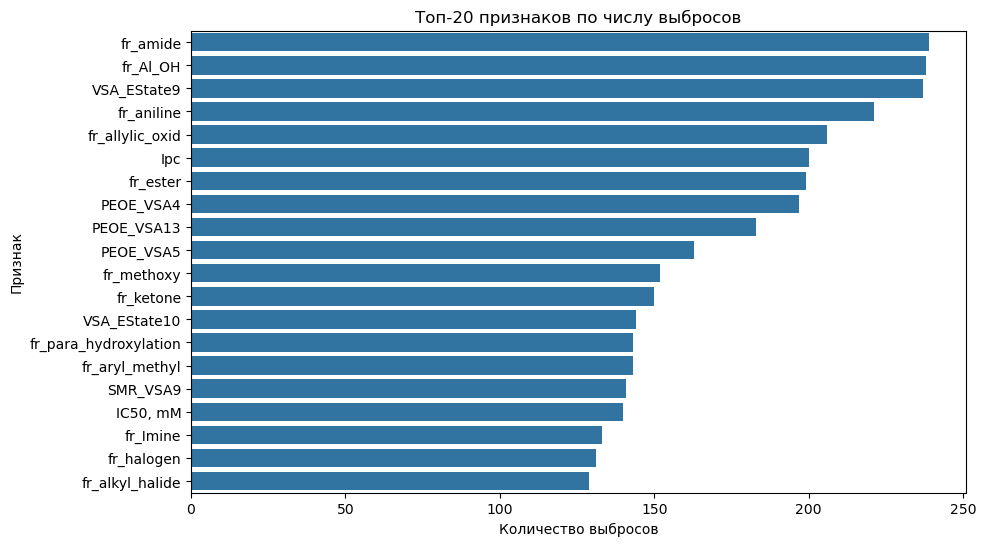

In [20]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]


# Считаем количество выбросов для числовых признаков
outlier_counts = {}
for col in data.select_dtypes(include=["float64", "int64"]).columns:
    cnt = detect_outliers(data, col)
    outlier_counts[col] = cnt

# Преобразуем в датафрейм
outlier_df = pd.DataFrame(
    list(outlier_counts.items()), columns=["column", "outlier_count"]
)
outlier_df = outlier_df.sort_values(by="outlier_count", ascending=False).reset_index(
    drop=True
)

print("Таблица выбросов:")
display(outlier_df)

top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(data=outlier_df.head(top_n), x="outlier_count", y="column")
plt.title(f"Топ-{top_n} признаков по числу выбросов")
plt.xlabel("Количество выбросов")
plt.ylabel("Признак")
plt.show()

In [21]:
def drop_low_variance_features(df, threshold=0.1):
    """
    Удаляет признаки с дисперсией ниже threshold.
    """
    # считаем дисперсию только для числовых признаков
    variances = df.var(numeric_only=True)

    # выбираем признаки с низкой дисперсией
    low_var_features = variances[variances < threshold].index.tolist()

    print(f"Удалены признаки (дисперсия < {threshold}):", low_var_features)

    return df.drop(columns=low_var_features), low_var_features


data, removed_low_var = drop_low_variance_features(data, threshold=0.1)

Удалены признаки (дисперсия < 0.1): ['fr_azo', 'fr_phos_ester', 'fr_Ar_NH', 'fr_SH', 'fr_epoxide', 'fr_benzodiazepine', 'MaxPartialCharge', 'fr_piperdine', 'fr_priamide', 'fr_pyridine', 'fr_aldehyde', 'BCUT2D_LOGPHI', 'fr_furan', 'fr_barbitur', 'SMR_VSA8', 'fr_lactam', 'fr_lactone', 'fr_thiocyan', 'fr_dihydropyridine', 'fr_nitrile', 'fr_nitro_arom', 'fr_hdrzone', 'fr_C_S', 'fr_sulfide', 'fr_nitroso', 'fr_Ar_COO', 'FpDensityMorgan1', 'fr_N_O', 'fr_imide', 'fr_oxazole', 'fr_hdrzine', 'fr_imidazole', 'BCUT2D_MRLOW', 'fr_azide', 'fr_thiophene', 'fr_guanido', 'fr_sulfonamd', 'fr_piperzine', 'fr_ArN', 'fr_prisulfonamd', 'fr_phos_acid', 'fr_alkyl_carbamate', 'fr_Al_COO', 'fr_isothiocyan', 'FractionCSP3', 'fr_HOCCN', 'fr_Ndealkylation2', 'SlogP_VSA9', 'fr_diazo', 'fr_thiazole', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'fr_Ndealkylation1', 'fr_term_acetylene', 'fr_quatN', 'fr_isocyan', 'qed', 'MinAbsEStateIndex', 'MinPartialCharge', 'fr_tetrazole', 'fr_sulfone', 'fr_amidine', 'fr_oxime', 'NumRadicalElec

In [22]:
data.to_excel('data/data.xlsx', index=False)